In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('fcc-forums-pageviews.csv')

In [8]:
df.set_index('date', drop=True, inplace=True)
df.index = [pd.Timestamp(d) for d in df.index]


In [9]:
df = df[(df['value']<=df['value'].quantile(0.975)) & (df['value']>=df['value'].quantile(0.025))]

In [10]:
df.shape

(1238, 1)

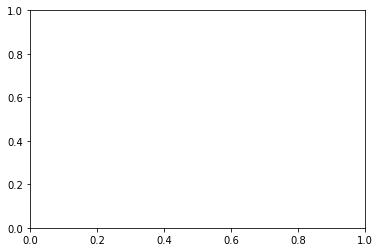

In [87]:
    fig, axs = plt.subplots(1, 1)


In [92]:
fig.set_figwidth(30)
fig.set_figheight(10)

Text(0, 0.5, 'Page Views')

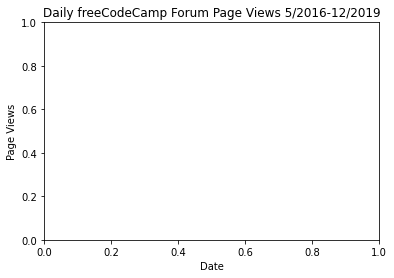

In [93]:
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

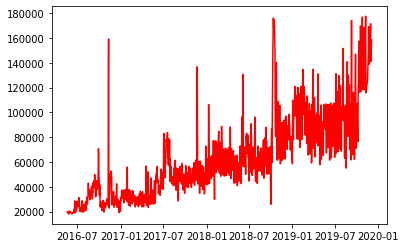

In [94]:
plt.plot(df.index, df['value'], color='r')


/home/shanmuk/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


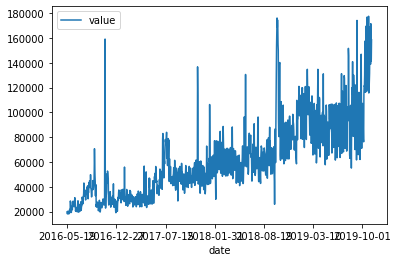

In [63]:
fi = df.plot.line()

In [75]:
df['date_m'] = pd.to_datetime(df['date'], format="%Y-%m")

In [95]:
df_bar = df.copy()

In [96]:
months = np.zeros([12, 4])

In [97]:
months

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [99]:

leglab = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
labels = [2016, 2017, 2018, 2019]

In [100]:
for i in range(12):
    for j, year in enumerate(labels):
        t = df[df.index.year ==year]
        months[i][j] = t[t.index.month==i].value.mean()

In [101]:
months

array([[            nan,             nan,             nan,
                    nan],
       [            nan,  32785.16129032,  58580.09677419,
        102056.51612903],
       [            nan,  31113.07142857,  65679.        ,
        105968.35714286],
       [            nan,  29369.09677419,  62693.77419355,
         91214.48387097],
       [            nan,  30878.73333333,  62350.83333333,
         89368.43333333],
       [ 19432.4       ,  34244.29032258,  56562.87096774,
         91439.90322581],
       [ 21875.10526316,  43577.5       ,  70117.        ,
         90435.64285714],
       [ 24109.67857143,  65806.83870968,  63591.06451613,
         97236.56666667],
       [ 31049.19354839,  47712.4516129 ,  62831.61290323,
        102717.31034483],
       [ 41476.86666667,  47376.8       ,  65941.73333333,
         97268.83333333],
       [ 27398.32258065,  47438.70967742, 111378.14285714,
        122802.27272727],
       [ 40448.63333333,  57701.56666667,  78688.33333333,
      

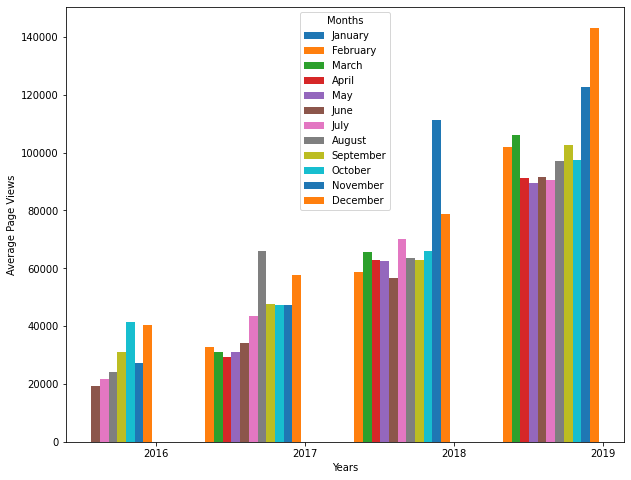

In [106]:

    x = np.arange(len(labels))
    width = 0.7
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)

    for i, month in enumerate(months):
        ax.bar(x - (width * (12 - i) / 12), months[i], width / 12, label=leglab[i])
    
    ax.set_ylabel("Average Page Views")
    ax.set_xlabel("Years")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(title='Months')

In [104]:
plt.show()

Text(0, 0.5, 'Page Views')

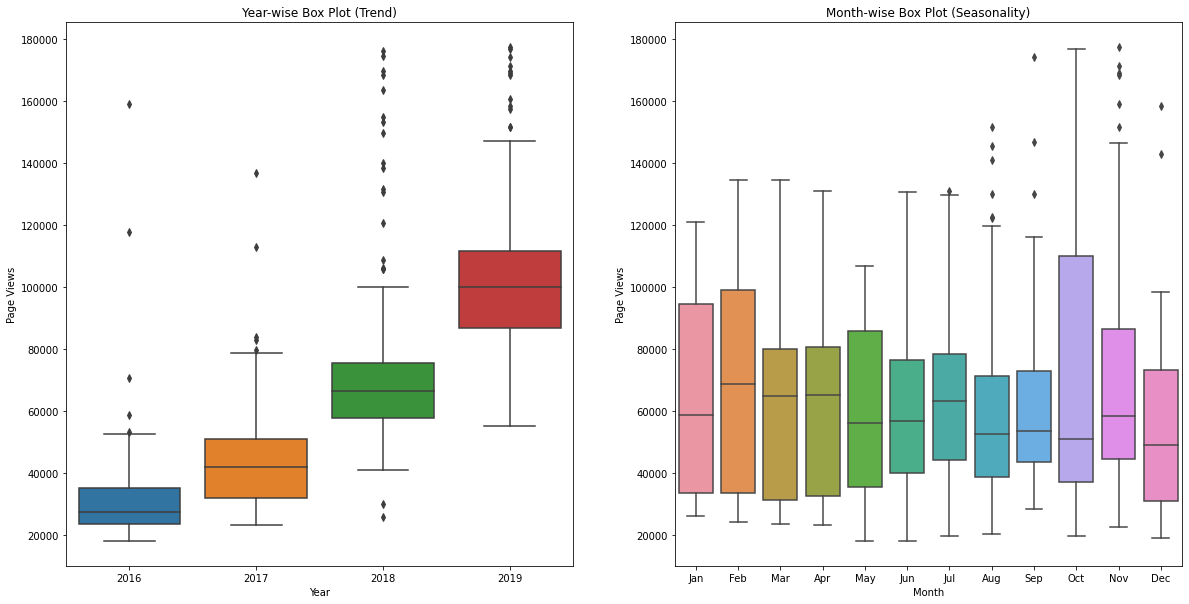

In [11]:
    df_box = df.copy()
    df_box['date'] = df_box.index
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    df_box['smonth'] = [d.strftime('%m') for d in df_box.date]

    df_box = df_box.sort_values(by='smonth')

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax1.set_title("Year-wise Box Plot (Trend)")
    ax2.set_title("Month-wise Box Plot (Seasonality)")

    ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    ax2 = sns.boxplot(x="month", y="value", data=df_box, ax=ax2)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
